In [7]:
import googlemaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint
from res_config import google_api_key

In [8]:
locations = [["43.651070,-79.347015"],["45.5019,-73.5674"],["51.0447,-114.0719"]
             ,["45.4215,-75.6972"],["53.5461,-113.4937"],["49.8954,-97.1385"],
             ["43.5890,-79.6441"],["49.2827,-123.1207"],["43.7315,-79.7624"],
             ["43.2557,-79.8711"]]
gmaps = googlemaps.Client(key = google_api_key)

In [9]:
res_add = []
res_status = []
res_name = []

for locs in locations:
    places_result = gmaps.places_nearby(location = locs[0], radius = 40000, open_now = False,type = "restaurant")


    for place in places_result["results"]:

        place_details = gmaps.place(place_id = place["place_id"])
        res_add.append(place_details["result"]["formatted_address"])
        res_status.append(place_details["result"]["business_status"])
        res_name.append(place_details["result"]["name"])

res_data = {
    "Name" : res_name,
    "Address" : res_add,
    "Status" : res_status,

}


df_res = pd.DataFrame(res_data)


In [10]:
bar_add = []
bar_status = []
bar_name = []

for locs in locations:
    places_result = gmaps.places_nearby(location = locs[0], radius = 40000, open_now = False,type = "bar")


    for place in places_result["results"]:

        place_details = gmaps.place(place_id = place["place_id"])
        bar_add.append(place_details["result"]["formatted_address"])
        bar_status.append(place_details["result"]["business_status"])
        bar_name.append(place_details["result"]["name"])

bar_data = {
    "Name" : bar_name,
    "Address" : bar_add,
    "Status" : bar_status,

}


df_bar = pd.DataFrame(bar_data)



In [11]:
cafe_add = []
cafe_status = []
cafe_name = []


for locs in locations:
    places_result = gmaps.places_nearby(location = locs[0], radius = 40000, open_now = False,type = "cafe")


    for place in places_result["results"]:

        place_details = gmaps.place(place_id = place["place_id"])
        cafe_add.append(place_details["result"]["formatted_address"])
        cafe_status.append(place_details["result"]["business_status"])
        cafe_name.append(place_details["result"]["name"])

cafe_data = {
    "Name" : cafe_name,
    "Address" : cafe_add,
    "Status" : cafe_status,

}


df_cafe = pd.DataFrame(cafe_data)



In [12]:
df_bar
frames = [df_res,df_bar,df_cafe]
 
result = pd.concat(frames)

operational = [df_res["Status"].value_counts()[0],df_bar["Status"].value_counts()[0],df_cafe["Status"].value_counts()[0]]
temp_closed = [df_res["Status"].value_counts()[1],df_bar["Status"].value_counts()[1],0]
index = ['Restaurants', 'Bars','Cafes']
status_data = {
               "Operational": operational,
               "Temporary Closed": temp_closed 
              }
status_df = pd.DataFrame(status_data, index=index)

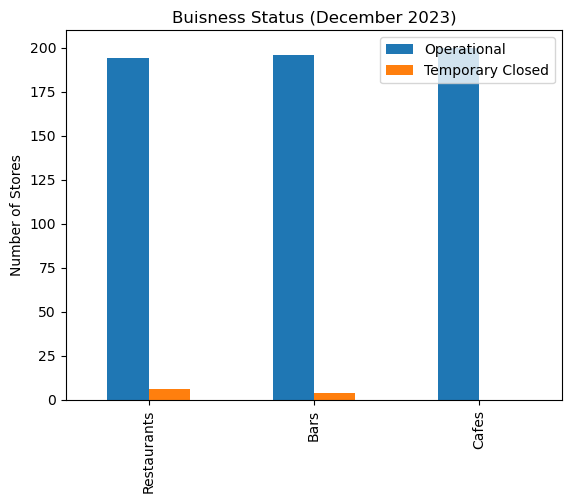

In [13]:
status_df.plot(kind = "bar")
plt.ylabel("Number of Stores")
plt.title("Buisness Status (December 2023)")
plt.savefig("Plots/Buisness Status.png")